In [233]:
import pandas as pd
from surprise.model_selection import train_test_split
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor, KNNBasic, KNNWithMeans, KNNWithZScore, KNNBaseline, SVD, BaselineOnly, SVDpp, NMF, SlopeOne, CoClustering
from surprise.accuracy import rmse
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('../data/movies/ratings.csv')

In [ ]:
df.drop('timestamp',axis=1,inplace=True)

In [ ]:
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df,reader)

In [ ]:
train, test = train_test_split(data, test_size=0.2)

## Test Surprise Algorithms

In [ ]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

In [ ]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

In [ ]:
surprise_results

## Using Surprise SVD++

In [ ]:
svdpp_options = {} # adjust hyper-params here
algo = SVDpp(SVDpp_options=svdpp_options)

In [ ]:
predictions = algo.fit(train).test(test)

In [ ]:
accuracy.rmse(predictions)

## Merging Nick & Kayla's Movie Rating Data

In [3]:
teach = pd.read_csv('../data/movies/g90_movie_ratings.csv')

In [4]:
teach.head()

,Name,21 Jump Street,28 Days Later,A Beautiful Mind,About Time,Air Force One,Alien,Aliens,American Gangster,Annihilation,...,The Godfather,The Intouchables,The Life Aquatic w. Steve Zissou,The Martian,The Pianist,Thor: Ragnarok,Three Billboards Outside Ebbing Missouri,Tron: Legacy,War Games,Wayne's World
0,Kayla Thomas,NaN,NaN,4.0,10.0,3.0,NaN,NaN,4.0,NaN,...,NaN,NaN,3.0,NaN,6.0,NaN,7.0,NaN,NaN,2.0
1,Nick Jacobsohn,7.0,NaN,NaN,NaN,NaN,10.0,8.0,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,7.0
2,Andrew,6.0,NaN,NaN,NaN,5.0,6.0,6.0,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,8.0,7.0,NaN,NaN,NaN
3,John Herr,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Jarred Bultema,6.0,6.0,8.0,NaN,5.0,5.0,NaN,7.0,3.0,...,NaN,NaN,6.0,8.0,6.0,10.0,NaN,5.0,5.0,7.0


In [8]:
teach = teach[:2]

In [9]:
teach

,Name,21 Jump Street,28 Days Later,A Beautiful Mind,About Time,Air Force One,Alien,Aliens,American Gangster,Annihilation,...,The Godfather,The Intouchables,The Life Aquatic w. Steve Zissou,The Martian,The Pianist,Thor: Ragnarok,Three Billboards Outside Ebbing Missouri,Tron: Legacy,War Games,Wayne's World
0,Kayla Thomas,NaN,NaN,4.0,10.0,3.0,NaN,NaN,4.0,NaN,...,NaN,NaN,3.0,NaN,6.0,NaN,7.0,NaN,NaN,2.0
1,Nick Jacobsohn,7.0,NaN,NaN,NaN,NaN,10.0,8.0,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,7.0


In [20]:
class_rat = pd.read_csv('../data/movies/g99_movie_rating.csv')

In [21]:
class_rat.head()

,Name,21 Jump Street,28 Days Later,A Beautiful Mind,About Time,Air Force One,Alien,Aliens,American Gangster,Annihilation,...,The Godfather,The Intouchables,The Life Aquatic w. Steve Zissou,The Martian,The Pianist,Thor: Ragnarok,Three Billboards Outside Ebbing Missouri,Tron: Legacy,War Games,Wayne's World
0,Kayla Thomas,5.0,NaN,4.0,10.0,3.0,NaN,NaN,4.0,NaN,...,NaN,NaN,3.0,NaN,6.0,NaN,7.0,NaN,NaN,2.0
1,Alex Cross,5.0,4.0,8.0,NaN,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN
2,Alex Rook,NaN,6.0,NaN,NaN,NaN,8.0,6.0,NaN,NaN,...,NaN,NaN,NaN,8.0,NaN,8.0,NaN,NaN,7.0,6.0
3,Dan Reiff,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,5.0,NaN,4.0,4.0,NaN,NaN,NaN
4,Dan Riggi,7.0,3.0,7.0,NaN,7.0,8.0,6.0,9.0,NaN,...,10.0,NaN,5.0,7.0,NaN,7.0,NaN,3.0,NaN,4.0


In [25]:
cols = list(teach.columns.values)

In [29]:
teach.set_index(teach['Name'],inplace=True)

In [34]:
teach.drop(columns='Name',inplace=True)

In [40]:
teach.fillna(0,inplace=True)

In [42]:
teach = teach/2

In [43]:
teach

,21 Jump Street,28 Days Later,A Beautiful Mind,About Time,Air Force One,Alien,Aliens,American Gangster,Annihilation,Apollo 13,...,The Godfather,The Intouchables,The Life Aquatic w. Steve Zissou,The Martian,The Pianist,Thor: Ragnarok,Three Billboards Outside Ebbing Missouri,Tron: Legacy,War Games,Wayne's World
Name,,,,,,,,,,,,,,,,,,,,,
Kayla Thomas,0.0,0.0,2.0,5.0,1.5,0.0,0.0,2.0,0.0,2.0,...,0.0,0.0,1.5,0.0,3.0,0.0,3.5,0.0,0.0,1.0
Nick Jacobsohn,3.5,0.0,0.0,0.0,0.0,5.0,4.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,3.5


In [49]:
teach.index[0]

'Kayla Thomas'

In [75]:
movies[movies['title'] == cols[3]]

,movieId,title,genres


In [98]:
names_lst = []
movies_lst = []
ratings_lst = []

for idx, row in enumerate(teach.values):
    for movie, val in enumerate(row):
        if val > 0:
            #input = ','.join(name,title,val)
            names_lst.append(teach.index[idx])
            movies_lst.append(cols[movie+1])
            ratings_lst.append(val)
            

In [179]:
new_df = pd.DataFrame({'user':names_lst,'movie':movies_lst,'rating':ratings_lst})

In [180]:
def f(row):
    if row['user'] == 'Kayla Thomas':
        val = 99999998
    elif row['user'] == 'Nick Jacobsohn':
        val = 99999999
    return val

In [181]:
new_df['userId'] = new_df.apply(f, axis=1)

In [182]:
new_df

,user,movie,rating,userId
0,Kayla Thomas,A Beautiful Mind,2.0,99999998
1,Kayla Thomas,About Time,5.0,99999998
2,Kayla Thomas,Air Force One,1.5,99999998
3,Kayla Thomas,American Gangster,2.0,99999998
4,Kayla Thomas,Apollo 13,2.0,99999998
5,Kayla Thomas,Back to the Future,2.5,99999998
6,Kayla Thomas,Count of Monte Cristo,4.0,99999998
7,Kayla Thomas,Eternal Sunshine of the Spotless Mind,1.0,99999998
8,Kayla Thomas,Girl with a Pearl Earring,1.5,99999998
9,Kayla Thomas,Gladiator,2.5,99999998


In [183]:
teach_ratings = new_df.merge(movies,how='left',left_on='movie',right_on='title')

In [184]:
teach_ratings.drop(['genres','movie','title','user'],axis=1,inplace=True)

In [185]:
teach_ratings.dropna(axis=0,inplace=True)

In [186]:
teach_ratings['movieId'] = [int(ID) for ID in teach_ratings['movieId']]

In [197]:
teach_ratings = teach_ratings[['userId','movieId','rating']]

In [198]:
teach_ratings

,userId,movieId,rating
1,99999998,104374,5.0
2,99999998,1608,1.5
3,99999998,55765,2.0
4,99999998,150,2.0
5,99999998,1270,2.5
7,99999998,7361,1.0
8,99999998,7151,1.5
9,99999998,3578,2.5
10,99999998,8132,2.5
11,99999998,1704,3.0


In [10]:
ratings = pd.read_csv('../data/movies/ratings.csv')

In [195]:
ratings.drop('timestamp',axis=1,inplace=True)

In [342]:
teach_ratings.to_csv('kaylanick.csv',index=False)

In [211]:
ratings = ratings.append(teach_ratings)

In [212]:
ratings

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0
5,1,1263,2.0
6,1,1287,2.0
7,1,1293,2.0
8,1,1339,3.5
9,1,1343,2.0


In [213]:
ratings.to_csv('ratings_plus.csv',index=False)

In [214]:
ratings_kaylanick = pd.read_csv('../data/movies/ratings_plus.csv')

In [216]:
ratings_kaylanick.tail()

,userId,movieId,rating
100036,99999999,3527,1.5
100037,99999999,296,4.5
100038,99999999,2028,1.5
100039,99999999,8874,4.0
100040,99999999,3253,3.5


In [122]:
movies = pd.read_csv('../data/movies/movies.csv')

In [123]:
movies['title'] = [title[:-7] for title in movies['title']]

In [338]:
movies.head()

,movieId,title,genres
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,Adventure|Children|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama|Romance
4,5,Father of the Bride Part II,Comedy


In [96]:
movies[movies['title']=='About Time']

,movieId,title,genres


In [12]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
links = pd.read_csv('../data/movies/links.csv')

In [16]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [18]:
tags = pd.read_csv('../data/movies/tags.csv')

In [19]:
tags.head()

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765


## EDA

In [336]:
sum(rating_cnt)/(len(top_movies)*len(user_ratingcnt))

0.016396352454462224

In [221]:
ratings.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [218]:
# distribution of ratings

In [223]:
rating_cnt = ratings.groupby('rating').count()['userId']
rating_cnt

rating
0.5     1101
1.0     3329
1.5     1691
2.0     7277
2.5     4454
3.0    20065
3.5    10543
4.0    28755
4.5     7727
5.0    15099
Name: userId, dtype: int64

In [228]:
x = np.random.randn(100)
x

array([ 7.23486690e-01,  1.61546568e-01,  9.62668146e-03,  5.18977483e-02,
        7.39855273e-01,  8.30887116e-02, -1.80493388e+00, -6.95340652e-01,
       -6.03793955e-01, -1.83247251e-01,  1.41150667e+00,  1.31162783e+00,
        1.58038025e+00,  1.63983843e+00, -2.36074555e-01, -2.44976362e+00,
        1.38030570e+00,  1.06866529e+00,  1.49096146e-02,  3.52242376e-03,
        1.13353795e+00, -2.55417942e-01, -1.38278069e-03, -1.02130130e+00,
       -1.42145830e+00,  1.09136046e-01,  8.32637812e-01,  4.93111703e-01,
        6.75757532e-01, -5.26261914e-01, -3.87174484e-01,  5.16268263e-01,
        5.31770621e-01, -3.02310117e-03,  7.83464279e-01, -1.18363752e+00,
       -6.77892528e-02,  1.55941087e+00, -2.17118353e-01,  4.50405363e-01,
        5.81156809e-01,  1.37943285e+00, -2.56476441e+00, -7.06650674e-01,
        5.22360648e-02, -4.93984442e-01, -7.89759693e-01,  1.47034902e+00,
       -2.40447457e-01, -1.70853308e-01, -1.40940091e+00,  8.96142482e-02,
        4.32329045e-01, -

In [231]:
np.array(ratings['rating'])

array([2.5, 3. , 3. , ..., 1.5, 4. , 3.5])

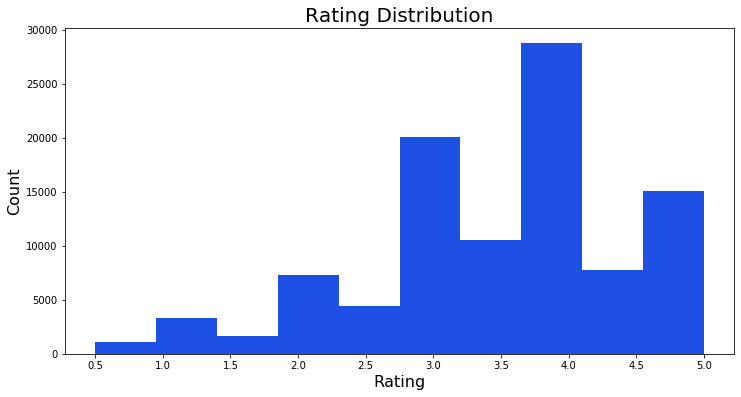

In [335]:
fig,ax = plt.subplots(figsize=(12,6))
plt.hist(ratings['rating'], color = '#1e50e6')
plt.xlabel('Rating',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.title('Rating Distribution',fontsize=20)
ax.set_xticks(np.linspace(0.5,5,10));

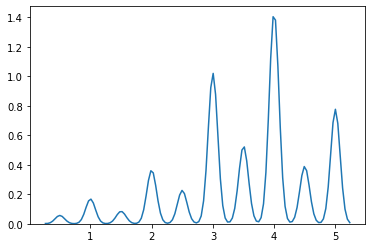

In [237]:
ax = sns.distplot(np.array(ratings['rating']), hist=False)

In [219]:
# most rated movies

In [263]:
top_movies = ratings.groupby('movieId').count()['rating']
top_movies = top_movies.sort_values(ascending=False)
top_movies

movieId
356       341
296       325
318       311
593       304
260       291
480       274
2571      259
1         247
527       244
589       237
1196      234
1270      228
110       228
608       224
1198      220
2858      220
780       218
1210      217
588       215
457       213
2959      202
590       202
47        201
150       201
50        201
4993      200
858       200
364       200
380       198
32        196
         ... 
26694       1
26695       1
26701       1
3003        1
26492       1
26346       1
3021        1
26349       1
26350       1
26371       1
26393       1
3031        1
26394       1
26400       1
3025        1
26404       1
26409       1
26413       1
26487       1
26414       1
26422       1
26430       1
26435       1
26462       1
26464       1
26467       1
26471       1
26480       1
26485       1
163949      1
Name: rating, Length: 9066, dtype: int64

In [ ]:
movies_mapped = 

In [ ]:
movies_mapped = []
for movie in top_movies.index:
    movies_mapped.append()

In [266]:
most_ratings = pd.DataFrame({'movie':top_movies.index,'ratings':top_movies.values})

In [268]:
most_ratings = most_ratings.merge(movies,how='left',left_on='movie',right_on='movieId')

In [271]:
most_ratings = most_ratings.drop(['movie','movieId','genres'],axis=1)

In [273]:
most_ratings[:15]

,ratings,title
0,341,Forrest Gump
1,325,Pulp Fiction
2,311,"Shawshank Redemption, The"
3,304,"Silence of the Lambs, The"
4,291,Star Wars: Episode IV - A New Hope
5,274,Jurassic Park
6,259,"Matrix, The"
7,247,Toy Story
8,244,Schindler's List
9,237,Terminator 2: Judgment Day


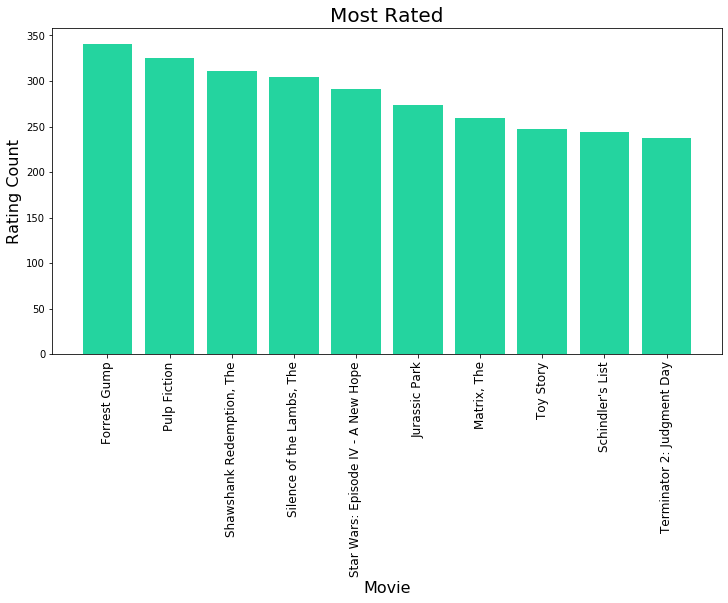

In [287]:
fig,ax = plt.subplots(figsize=(12,6))
plt.bar(most_ratings[:10]['title'], most_ratings[:10]['ratings'], color = '#24d49f')
plt.xlabel('Movie',fontsize=16)
plt.ylabel('Rating Count',fontsize=16)
plt.xticks(rotation = 90,fontsize=12)
plt.title('Most Rated',fontsize=20);

In [296]:
movies.head()

,movieId,title,genres
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,Adventure|Children|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama|Romance
4,5,Father of the Bride Part II,Comedy


In [302]:
avg_rating = pd.DataFrame(ratings.groupby('movieId').mean()['rating'])
avg_rating = avg_rating.merge(movies,how='left',left_on='movieId',right_on='movieId')
avg_rating.drop(['genres'],axis=1,inplace=True)

In [303]:
avg_rating

,movieId,rating,title
0,1,3.872470,Toy Story
1,2,3.401869,Jumanji
2,3,3.161017,Grumpier Old Men
3,4,2.384615,Waiting to Exhale
4,5,3.267857,Father of the Bride Part II
5,6,3.884615,Heat
6,7,3.283019,Sabrina
7,8,3.800000,Tom and Huck
8,9,3.150000,Sudden Death
9,10,3.450820,GoldenEye


In [307]:
top_rated_ratings = most_ratings.merge(avg_rating,how='left',left_on='title',right_on='title')
top_rated_ratings.drop('movieId',axis=1,inplace=True)
top_rated_ratings[:10]

,ratings,title,rating
0,341,Forrest Gump,4.054252
1,325,Pulp Fiction,4.256923
2,311,"Shawshank Redemption, The",4.487138
3,304,"Silence of the Lambs, The",4.138158
4,291,Star Wars: Episode IV - A New Hope,4.221649
5,274,Jurassic Park,3.706204
6,259,"Matrix, The",4.183398
7,247,Toy Story,3.872470
8,244,Schindler's List,4.303279
9,237,Terminator 2: Judgment Day,4.006329


''

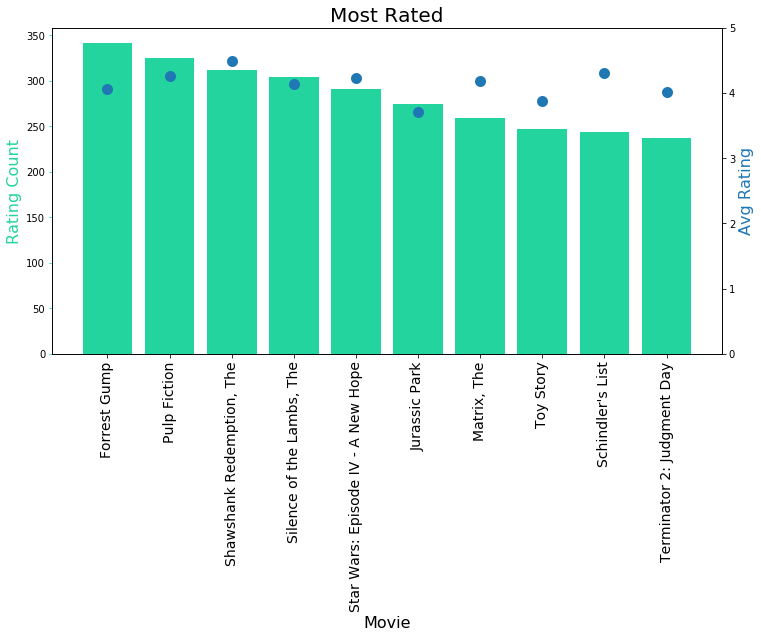

In [341]:
fig, ax1 = plt.subplots(figsize=(12,6))
color = '#24d49f'
ax1.bar(most_ratings[:10]['title'], most_ratings[:10]['ratings'], color = '#24d49f')
ax1.set_ylabel('Rating Count',fontsize=16,color=color)
ax1.set_xlabel('Movie',fontsize=16)
ax1.tick_params(axis='x', rotation=90,labelsize=14)
ax1.tick_params(axis='y',color = color)

color = 'tab:blue'
ax2 = ax1.twinx()
ax2.set_ylabel('Avg Rating',fontsize=16,color=color)
ax2.scatter(top_rated_ratings['title'][:10],top_rated_ratings['rating'][:10],linewidths=5, color = color)
ax2.set_yticks([0,1,2,3,4,5])

plt.title('Most Rated',fontsize=20)
;

In [ ]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

In [220]:
# distribution of user ratings count

In [259]:
user_ratingcnt = ratings.groupby('userId').count()['rating']
user_ratingcnt = user_ratingcnt.sort_values(ascending=False)
user_ratingcnt

userId
547         2391
564         1868
624         1735
15          1700
73          1610
452         1340
468         1291
380         1063
311         1019
30          1011
294          947
509          923
580          922
213          910
212          876
472          830
388          792
23           726
457          713
518          707
461          696
232          682
102          678
262          676
475          655
306          645
119          641
654          626
358          617
529          604
            ... 
14            20
337           20
1             20
35            20
445           20
668           20
657           20
651           20
638           20
604           20
583           20
540           20
498           20
485           20
484           20
448           20
444           20
76            20
438           20
399           20
99999998      20
325           20
319           20
310           20
296           20
289           20
249           20
221    

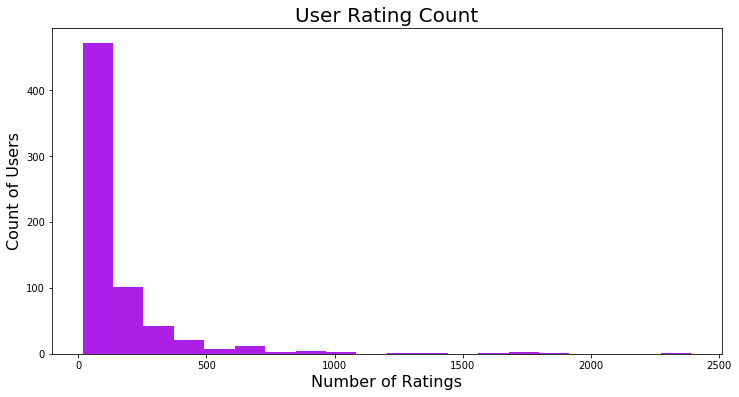

In [337]:
fig,ax = plt.subplots(figsize=(12,6))
plt.hist(user_ratingcnt, color = '#ad1ee6',bins=20)
plt.xlabel('Number of Ratings',fontsize=16)
plt.ylabel('Count of Users',fontsize=16)
plt.title('User Rating Count',fontsize=20);